#                          Detailed Analyses - Churn through time                                      #


Following the exploratory analyses, from now ahead, detailed analyses will be performed in order to understand what are the causes behind the patterns observed in the previous step. These analyses will be performed considering just part of the dataset - the one which presents the higher churn rates and more than 4000 as total number of customers.

## Environment setting

#### * Import the requested libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### * Load the file

In [2]:
arquivo = 'dataset1.csv'
dataset1 = pd.read_csv(arquivo, sep=',' ,header=0)

#### * Exploratory view

In [3]:
dataset1.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,months,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev
0,1,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,...,61,219.25,0.00,0.0,23.9975,0.0,1652,4228.00000,22.500,1504.62
1,0,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,...,56,482.75,22.75,9.1,57.4925,0.0,14654,26400.00000,37.425,2851.68
2,1,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,...,58,10.25,0.00,0.0,16.9900,0.0,7903,24385.05333,16.990,2155.91
3,0,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,...,60,7.50,0.00,0.0,38.0000,0.0,1502,3065.00000,38.000,2000.90
4,0,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,...,57,570.50,0.00,0.0,55.2300,0.0,4485,14028.00000,71.980,2181.12


## Hypothesis 1 - Churned customers have called more times to Customer Care and this trend is observed though time 

The reason why some customers cancel their accounts might be related to the quality of the service provided. If the service is not what the customer expected it to be or if its quality is not good enough according to the customers' demands, there is a  trend of cancelling their accounts. However, most of the customers are willing to report the problems to the company in order to have them solved. Thus, they contact Customer Care to do it. Once the problem is not solved, they churn. The objective here is to investigate if churned customers have called more times to Customer Care and to evaluate how this happened through their months as clients.    

#### * Filter the dataset to perform detailed analyses

In [3]:
dataset2 = dataset1.loc[dataset1['months'] <= 25]
dataset2.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,months,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev
8144,0,1,5782.0,1404,729.78,3.0,GREAT LAKES AREA,N,27.333333,81,...,23,88.50,0.0,0.0,30.0000,0.0,1433,5918.0,30.000,781.58
9006,0,1,14231.0,3096,1659.86,4.0,GREAT LAKES AREA,N,128.333333,858,...,24,852.25,0.0,0.0,76.7225,0.0,3169,14436.0,84.990,1738.19
9431,1,3,1368.0,576,497.73,5.0,NEW YORK CITY AREA,N,29.333333,58,...,25,46.50,0.0,0.0,10.0000,0.0,607,1468.0,10.000,559.90
9605,1,2,3972.0,1058,693.02,NaN,DALLAS AREA,N,72.666667,443,...,20,388.75,125.0,37.5,81.0125,0.0,1243,4463.0,42.480,745.58
9765,1,2,2508.0,1049,559.55,2.0,HOUSTON AREA,N,29.000000,93,...,21,95.25,0.0,0.0,31.8350,0.0,1173,2772.0,39.335,622.90


#### * Data Cleaning
    * Verify columns with null values - The dataset will be processed according to the hypothesis to be tested

In [4]:
dataset2.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           19578
area                33
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2783
avg6qty           2783
avg6rev           2783
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         472
change_rev         472
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean            93
ovrmou_Mean         93
ovrrev_Mean         93
rev_Mean            93
roam_Mean           93
totcalls             0
totmou               0
totmrc_Mean         93
totrev               0
dtype: int64

#### * Delete null values - take the hash out in case there are null values in the columns of interest
    * Pay attention to the dataset numbers if you take the hashes out

In [ ]:
## dataset3 = dataset2.dropna(subset=['months'], axis=0, how='any')
## dataset3.isnull().sum()

#### * Save the dataset

In [5]:
dataset2.to_csv('top_churn.csv', index = False);

#### * Bar plot showing the number of Customer Care calls made by group of user through time

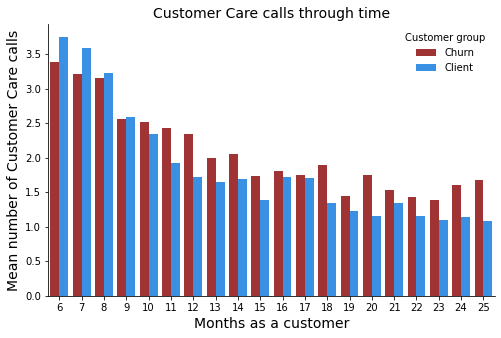

In [7]:
colors = ['firebrick','dodgerblue']
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(data=dataset2,
            x = "months",
            y = "custcare_Mean",
            hue = 'churn',
            ci = None,
            palette = colors)
ax.set_title('Customer Care calls through time',
                fontsize=14)
plt.legend(labels=["Churn","Client"],
           loc = 'upper right',
           title='Customer group',
           frameon=False)
plt.xlabel("Months as a customer",
           fontsize=14)
plt.ylabel("Mean number of Customer Care calls",
           fontsize=14)

sns.despine()

plt.savefig("churn_custcare.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 1* --> Current and Churned customers basically did not show differences concerning the number of calls to Customer Care. However, in the months with the higher churn rates, there were more calls to Customer Care. Some of the clients churned, and we can infer that the clients who kept their accounts might churn in the next months. Investigating the reasons of the churns in this period might help preventing new churns. From the ninth month to the twenty-forth (considering the margin of error), Churned customers made more calls to Customer Care, while there was a decrease in the number of these calls by Current customers. It would be interesting to investigate the reason of it.     

## Hypothesis 2 - Churned customers did not experience a good quality of service

Following the idea that some customers churned because they did not have their problems solved by the company, it is proposed that this problem was the quality of the service. Regarding telecom companies, maybe the most important service that has to be delivered is the efficiency between attempted calls and completed calls. The objective here is to investigate if the quality of this service was responsible for the number of churns.       

#### * Create the Eficciency Tax variable

In [9]:
dataset2['efficiency_rate'] = np.divide(dataset2['complete_Mean'], dataset2['attempt_Mean'])
dataset2

C:\Users\warri\AppData\Local\Temp/ipykernel_9888/598483957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['efficiency_rate'] = np.divide(dataset2['complete_Mean'], dataset2['attempt_Mean'])


,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,efficiency_tax,efficiency_rate
8144,0,1,5782.0,1404,729.78,3.0,GREAT LAKES AREA,N,27.333333,81,...,0.0,0.0,30.0000,0.0,1433,5918.0,30.000,781.58,0.768293,0.768293
9006,0,1,14231.0,3096,1659.86,4.0,GREAT LAKES AREA,N,128.333333,858,...,0.0,0.0,76.7225,0.0,3169,14436.0,84.990,1738.19,0.779221,0.779221
9431,1,3,1368.0,576,497.73,5.0,NEW YORK CITY AREA,N,29.333333,58,...,0.0,0.0,10.0000,0.0,607,1468.0,10.000,559.90,0.818182,0.818182
9605,1,2,3972.0,1058,693.02,NaN,DALLAS AREA,N,72.666667,443,...,125.0,37.5,81.0125,0.0,1243,4463.0,42.480,745.58,0.683486,0.683486
9765,1,2,2508.0,1049,559.55,2.0,HOUSTON AREA,N,29.000000,93,...,0.0,0.0,31.8350,0.0,1173,2772.0,39.335,622.90,0.551724,0.551724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0,1,14363.0,6140,1848.56,2.0,LOS ANGELES AREA,N,210.000000,686,...,NaN,NaN,NaN,NaN,6321,14724.0,NaN,1944.94,0.801587,0.801587
99994,1,1,91922.0,42867,13510.14,1.0,LOS ANGELES AREA,N,1999.666667,5768,...,NaN,NaN,NaN,NaN,43492,93435.0,NaN,13830.66,0.830805,0.830805
99995,1,1,9494.0,3751,1561.14,5.0,LOS ANGELES AREA,N,54.666667,410,...,NaN,NaN,NaN,NaN,3771,9534.0,NaN,1594.83,0.829268,0.829268
99998,0,1,20488.0,9921,2593.26,NaN,SOUTHWEST AREA,N,551.000000,1031,...,NaN,NaN,NaN,NaN,10082,20784.0,NaN,2669.20,0.757411,0.757411


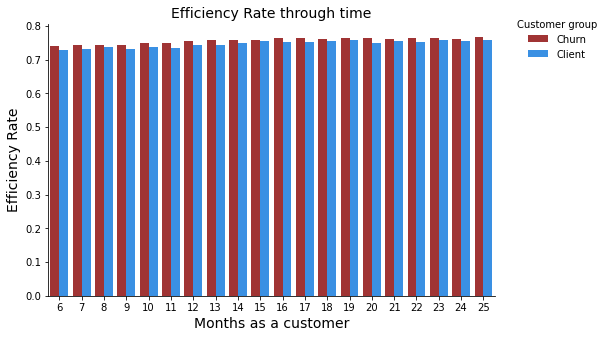

In [14]:
colors = ['firebrick','dodgerblue']
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(data=dataset2,
            x = "months",
            y = "efficiency_rate",
            hue = 'churn',
            ci = None,
            palette = colors)
ax.set_title('Efficiency Rate through time',
                fontsize=14)
plt.legend(labels=["Churn","Client"],
           loc = 'upper right',
           title='Customer group',
           frameon=False,
          bbox_to_anchor=(1.25, 1.05))
plt.xlabel("Months as a customer",
           fontsize=14)
plt.ylabel("Efficiency Rate",
           fontsize=14)

sns.despine()


plt.savefig("effrate_through_time.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 2* --> Efficiency rate was not the responsible for the churn rate, once the quality of the service provided was similar between Churned and Current Customers through time.